## Using TomoPhantom to:
* build a random phantom
* generate analytical sinogram from it and add various artifacts to it
* reconstruct the noisy sinogram using the Fourier method (ToMoBAR package required)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tomophantom import TomoP2D 
from tomophantom.generator import foam2D

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

Text(0.5, 1.0, '2D random phantom')

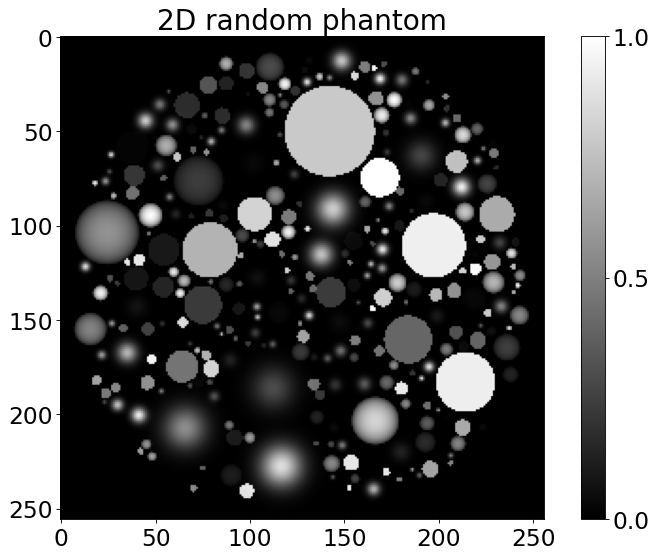

In [11]:
# generate a random phantom
N_size = 256 # define the grid size
tot_objects = 300 # the total number of objects to generate

# define ranges for parameters
x0min = -0.9
x0max = 0.9
y0min = -0.9
y0max = 0.9
z0min = -0.9
z0max = 0.9
c0min = 0.01
c0max = 1.0
ab_min = 0.01
ab_max = 0.25

(Objfoam2D, myObjects) = foam2D(x0min, x0max, y0min, y0max, \
                               c0min, c0max, ab_min, ab_max, \
                               N_size, tot_objects, \
                               object_type = 'mix')

plt.figure(1)
plt.rcParams.update({'font.size': 21})
plt.imshow(Objfoam2D, vmin=0, vmax=1, cmap="gray")
plt.colorbar(ticks=[0, 0.5, 1], orientation='vertical')
plt.title('2D random phantom')

Text(0.5, 1.0, 'Analytical sinogram')

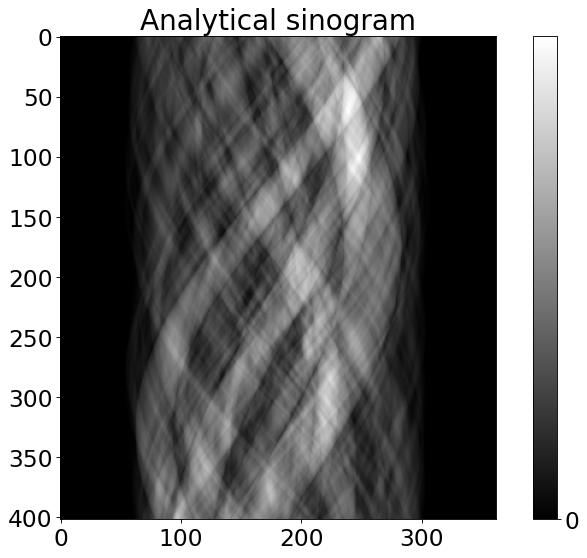

In [12]:
# generate analytical sinogram 
angles_num = int(0.5*np.pi*N_size); # angles number
angles = np.linspace(0,180,angles_num,dtype='float32')
angles_rad = angles*(np.pi/180)
P = int(np.sqrt(2)*N_size) #detectors

sino_Objfoam2D = TomoP2D.ObjectSino(N_size, P, angles, myObjects)

plt.figure(2)
plt.rcParams.update({'font.size': 21})
plt.imshow(sino_Objfoam2D,  cmap="gray")
plt.colorbar(ticks=[0, 150, 250], orientation='vertical')
plt.title('Analytical sinogram')

Zingers have been added to the data.
Stripes have been simulated.
Poisson noise have been added to the data.


Text(0.5, 1.0, 'Analytical noisy sinogram with artifacts')

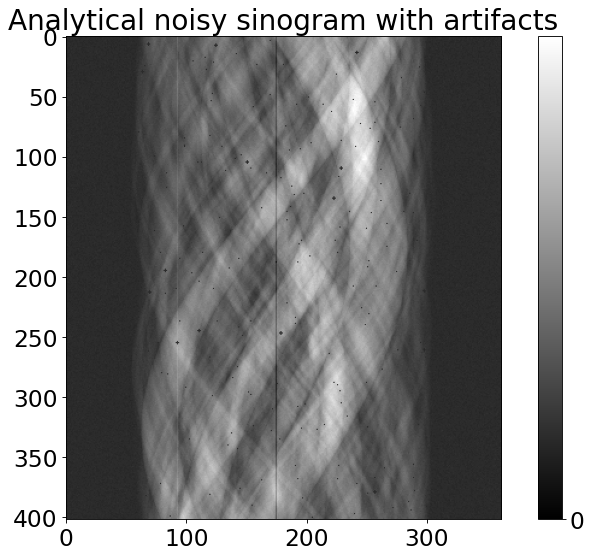

In [20]:
from tomophantom.artefacts import artefacts_mix

#adding noise
_noise_ =  {'noise_type' : 'Poisson',
            'noise_sigma' : 5000, # noise amplitude
            'noise_seed' : 0}

# adding zingers and stripes
_zingers_ = {'zingers_percentage' : 0.2,
             'zingers_modulus' : 10}

_stripes_ = {'stripes_percentage' : 0.8,
             'stripes_maxthickness' : 2.0,
             'stripes_intensity' : 0.25,
             'stripes_type' : 'full',
             'stripes_variability' : 0.002}

noisy_sino = artefacts_mix(sino_Objfoam2D, **_noise_, **_zingers_, \
                         **_stripes_)

plt.figure()
plt.rcParams.update({'font.size': 21})
plt.imshow(noisy_sino,cmap="gray")
plt.colorbar(ticks=[0, 150, 250], orientation='vertical')
plt.title('Analytical noisy sinogram with artifacts')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Reconstructing analytical sinogram using Fourier Slice method
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Text(0.5, 1.0, 'Fourier slice reconstruction')

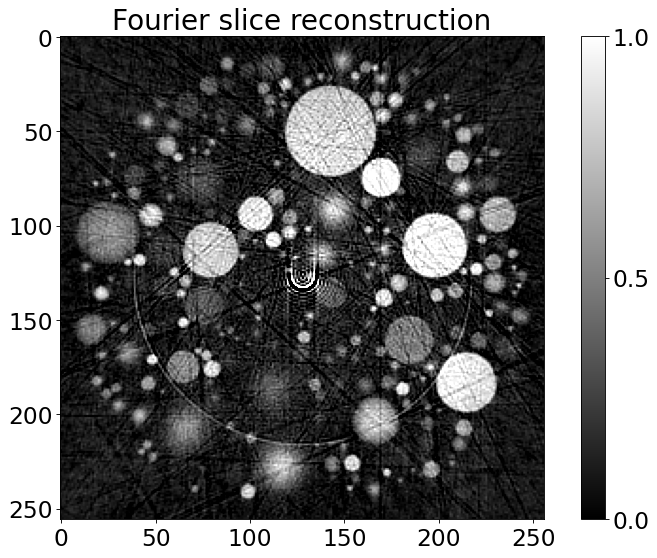

In [21]:
# one can use a ToMoBAR package to reconstruct the data
# install it with: conda install -c dkazanc tomobar

# initialise tomobar DIRECT reconstruction class ONCE
from tomobar.methodsDIR import RecToolsDIR
RectoolsDIR = RecToolsDIR(DetectorsDimH = P,  # DetectorsDimH # detector dimension (horizontal)
                    DetectorsDimV = None,  # DetectorsDimV # detector dimension (vertical) 
                    CenterRotOffset = None, # Centre of Rotation (CoR) scalar 
                    AnglesVec = angles_rad, # array of angles in radians
                    ObjSize = N_size, # a scalar to define reconstructed object dimensions
                    device_projector='cpu')
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print ("Reconstructing analytical sinogram using Fourier Slice method")
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
RecFourier = RectoolsDIR.FOURIER(noisy_sino,'linear') 
plt.figure() 
plt.imshow(RecFourier, vmin=0, vmax=1, cmap="gray")
plt.colorbar(ticks=[0, 0.5, 1], orientation='vertical')
plt.title('Fourier slice reconstruction')

Partial volume effect (PVE) have been simulated.
Fresnel propagator have been simulated.
Poisson noise have been added to the data.


Text(0.5, 1.0, 'Analytical noisy sinogram with artifacts2')

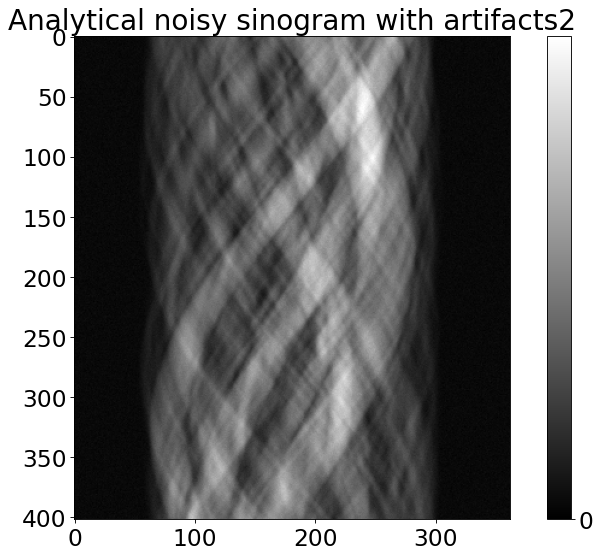

In [24]:
# partial volume effect and fresnel diffraction artifacts
_pve_ = {'pve_strength' : 1}
_fresnel_propagator_ = {'fresnel_dist_observation' : 10,
                        'fresnel_scale_factor' : 10,
                        'fresnel_wavelenght' : 0.003}
#adding noise
_noise_ =  {'noise_type' : 'Poisson',
            'noise_sigma' : 15000, # noise amplitude
            'noise_seed' : 0}

noisy_sino_fresnel = artefacts_mix(sino_Objfoam2D, **_noise_, \
                             **_pve_,\
                            **_fresnel_propagator_)
plt.figure()
plt.rcParams.update({'font.size': 21})
plt.imshow(noisy_sino_fresnel,cmap="gray")
plt.colorbar(ticks=[0, 150, 250], orientation='vertical')
plt.title('Analytical noisy sinogram with artifacts2')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Reconstructing analytical sinogram2 using Fourier method
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Text(0.5, 1.0, 'Fourier slice reconstruction')

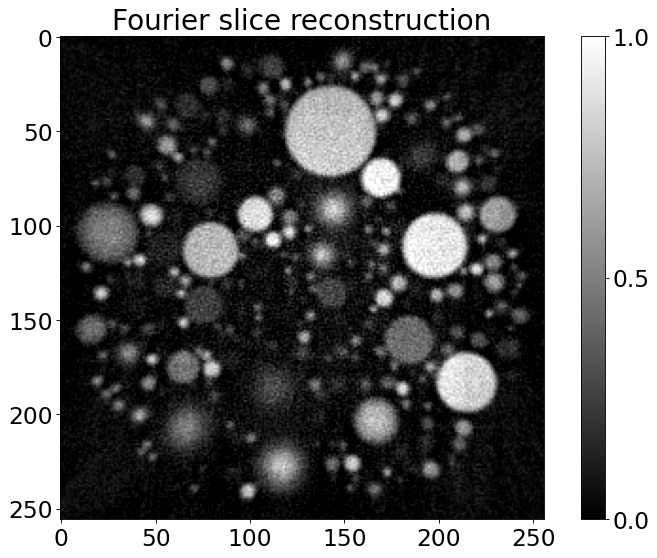

In [25]:
# one can use a ToMoBAR package to reconstruct the data
# install it with: conda install -c dkazanc tomobar

# initialise tomobar DIRECT reconstruction class ONCE
from tomobar.methodsDIR import RecToolsDIR
RectoolsDIR = RecToolsDIR(DetectorsDimH = P,  # DetectorsDimH # detector dimension (horizontal)
                    DetectorsDimV = None,  # DetectorsDimV # detector dimension (vertical) 
                    CenterRotOffset = None, # Centre of Rotation (CoR) scalar 
                    AnglesVec = angles_rad, # array of angles in radians
                    ObjSize = N_size, # a scalar to define reconstructed object dimensions
                    device_projector='cpu')
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print ("Reconstructing analytical sinogram2 using Fourier method")
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
RecFourier2 = RectoolsDIR.FOURIER(noisy_sino_fresnel,'linear') 
plt.figure() 
plt.imshow(RecFourier2, vmin=0, vmax=1, cmap="gray")
plt.colorbar(ticks=[0, 0.5, 1], orientation='vertical')
plt.title('Fourier slice reconstruction')